In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [8]:
df = pd.read_csv('D:\HomeLab\Temp_vs_Hum\Dataset\\feeds.csv', sep=',')

var_df = df[['field1', 'field2']]
var_df.head(5)

,field1,field2
0,17.5,76.2
1,17.5,76.0
2,17.4,76.1
3,17.4,75.6
4,32.3,36.1


c = 135.92871516135838
b = -4.152016063982475
a = 0.02518859800256229
0.8445398853813652


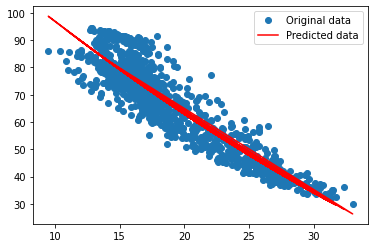

In [9]:
temp_datax = var_df.field1.dropna()
hum_datay = var_df.field2.dropna()

#compute the trend line
coeff = np.poly1d(np.polyfit(temp_datax, hum_datay, 2))
print(f"c = {coeff[0]}")
print(f"b = {coeff[1]}")
print(f"a = {coeff[2]}")

temp_datax = np.asarray(temp_datax)

Ttilde = np.polyval(coeff, temp_datax)

residuals = hum_datay - Ttilde

r2 = 1 - np.sum(residuals**2)/np.sum((hum_datay - np.mean(hum_datay))**2)

print(r2)


#create function iwth the coefficients
def f(x):
    return coeff[2]*x**2 + coeff[1]*x + coeff[0]

predicted_hum_datay = []
for i in temp_datax:
    predicted_hum_datay.append(f(i))

#Plot the original data vs the predicted data

plt.plot(temp_datax, hum_datay, 'o', label='Original data')
plt.plot(temp_datax, coeff(temp_datax), 'r', label='Predicted data')

plt.legend()
plt.show()